In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from pathlib import Path
import os
import csv
import os
os.environ["OMP_NUM_THREADS"] = '1'
from sklearn.cluster import KMeans
rcParams['figure.figsize'] = 9, 6

In [2]:
os.chdir('C:/Users/medco/OneDrive/Documents/GitHub/MLC_VRPTW/data_mlc')
files = os.listdir('C:/Users/medco/OneDrive/Documents/GitHub/MLC_VRPTW/data_mlc')

datanames = []

for f in files:
    name = f[16:len(f)-4]
    datanames.append(name)
    try:
        df = pd.read_csv('{}'.format(f))
        vars()['df_'+name] = df
    except KeyError:
        print('help!')
        continue


In [3]:
X = np.asarray(df__C1_2_1['XCOORD.'])
Y = np.asarray(df__C1_2_1['YCOORD.'])
XY = np.array((X,Y)).T
XY

array([[ 70,  70],
       [ 33,  78],
       [ 59,  52],
       [ 10, 137],
       [  4,  28],
       [ 25,  26],
       [ 86,  37],
       [  1, 109],
       [  6, 135],
       [ 32,  79],
       [ 24,  26],
       [ 86,  36],
       [ 95,  35],
       [ 63,  50],
       [100, 106],
       [ 99, 112],
       [ 36, 135],
       [ 57,  59],
       [  8, 124],
       [ 85, 106],
       [103,  69],
       [109, 131],
       [ 43, 140],
       [115, 134],
       [ 98,  70],
       [112,  67],
       [102, 104],
       [ 93,  75],
       [ 90, 104],
       [127, 108],
       [ 84,  99],
       [113,  69],
       [129,   9],
       [ 18,  38],
       [ 30,  27],
       [ 25,  80],
       [ 17,  37],
       [ 32, 106],
       [ 43, 135],
       [ 61,  59],
       [104, 106],
       [109,  71],
       [121, 110],
       [ 61,  48],
       [ 74,  99],
       [ 89,  73],
       [ 21,  25],
       [ 99,  28],
       [101,  96],
       [  9, 114],
       [121, 112],
       [137,   6],
       [118,

c:\Users\medco\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


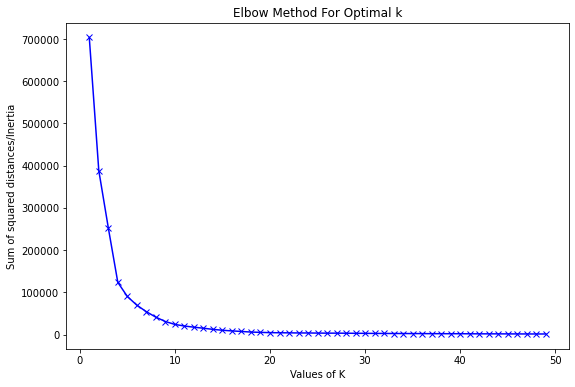

In [4]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,50)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(XY)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

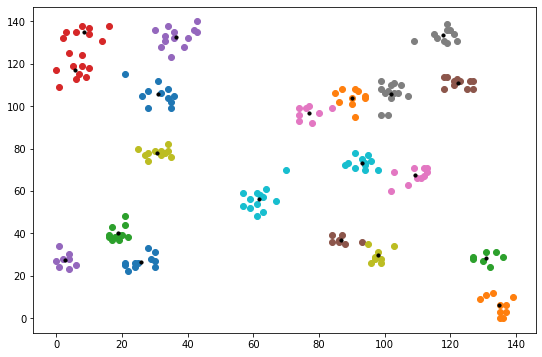

210

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20, random_state=1234)
label = kmeans.fit_predict(XY)

centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(XY[label == i , 0] , XY[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 10, color = 'k')
# plt.legend()
plt.show()

df = pd.DataFrame(XY,columns=['X','Y'])
df['lbl'] = label
df['demand'] = df__C1_2_1['DEMAND']

groupy = df.groupby('lbl').sum()
max(groupy.demand)

In [6]:
df['cust_no'] = df__C1_2_1['CUST NO.']

In [7]:
c_1_2_1 = pd.read_csv('MLC_project_sol_C1_2_1.csv',header=None)
# c_1_2_1

In [8]:
df['ready'] = df__C1_2_1['READY TIME']
df['due'] = df__C1_2_1['DUE DATE']

In [9]:
for i in df.lbl.unique():
    if df[df.lbl==i].demand.sum() > 200:
        print(i)

17


In [10]:
df[df.lbl==17].sort_values(by='ready',ascending=True)

,X,Y,lbl,demand,cust_no,ready,due
133,99,96,17,10,133,38,93
48,101,96,17,10,48,101,160
26,102,104,17,20,26,201,258
152,103,106,17,30,152,296,347
40,104,106,17,20,40,390,434
153,107,105,17,10,153,472,539
14,100,106,17,10,14,567,626
169,105,110,17,20,169,567,634
89,103,111,17,20,89,668,719
105,102,110,17,10,105,754,814


In [11]:
u_labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [12]:
X = np.asarray(df__C1_2_1['READY TIME'])
Y = np.asarray(df__C1_2_1['DUE DATE'])
XY = np.array((X,Y)).T

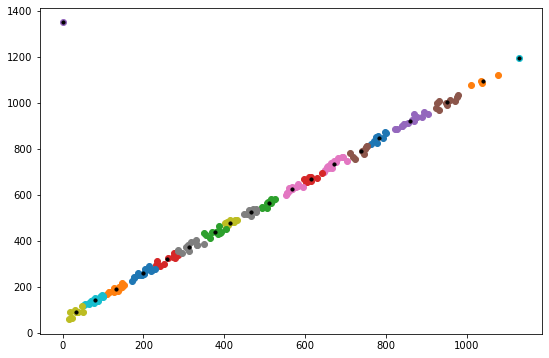

300

In [13]:


kmeans = KMeans(n_clusters=20, random_state=1234)
label = kmeans.fit_predict(XY)

centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(XY[label == i , 0] , XY[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 10, color = 'k')
# plt.legend()
plt.show()

df = pd.DataFrame(XY)
df['lbl'] = label
df['demand'] = df__C1_2_1['DEMAND']

groupy = df.groupby('lbl').sum()
max(groupy.demand)

In [21]:
X = np.asarray(df__C1_2_1['XCOORD.'])
Y = np.asarray(df__C1_2_1['YCOORD.'])
XY = np.array((X,Y)).T
# XY

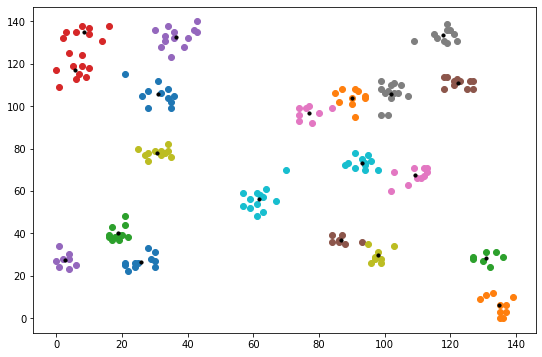

210

In [15]:
kmeans = KMeans(n_clusters=20, random_state=1234)
label = kmeans.fit_predict(XY)

centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(XY[label == i , 0] , XY[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 10, color = 'k')
# plt.legend()
plt.show()

df = pd.DataFrame(XY)
df__C1_2_1['lbl'] = label
df__C1_2_1['demand'] = df__C1_2_1['DEMAND']

groupy = df__C1_2_1.groupby('lbl').sum()
max(groupy.demand)

In [16]:
df = df__C1_2_1
df

,CUST NO.,XCOORD.,YCOORD.,DEMAND,READY TIME,DUE DATE,SERVICE TIME,lbl,demand
0,0,70,70,0,0,1351,0,9,0
1,1,33,78,20,750,809,90,8,20
2,2,59,52,20,553,602,90,9,20
3,3,10,137,30,147,219,90,13,30
4,4,4,28,10,616,661,90,14,10
...,...,...,...,...,...,...,...,...,...
196,196,91,108,10,384,430,90,1,10
197,197,130,27,30,229,280,90,2,30
198,198,101,107,10,1038,1090,90,17,10
199,199,34,108,10,506,566,90,10,10


In [17]:

df17 = df[df.lbl==17].sort_values(by='READY TIME',ascending=True).reset_index()
df17['diff'] = df17['READY TIME'] - df17['DUE DATE'].shift(1)
df17 = df17.replace(np.nan,0)
df17

,index,CUST NO.,XCOORD.,YCOORD.,DEMAND,READY TIME,DUE DATE,SERVICE TIME,lbl,demand,diff
0,133,133,99,96,10,38,93,90,17,10,0.0
1,48,48,101,96,10,101,160,90,17,10,8.0
2,26,26,102,104,20,201,258,90,17,20,41.0
3,152,152,103,106,30,296,347,90,17,30,38.0
4,40,40,104,106,20,390,434,90,17,20,43.0
5,153,153,107,105,10,472,539,90,17,10,38.0
6,14,14,100,106,10,567,626,90,17,10,28.0
7,169,169,105,110,20,567,634,90,17,20,-59.0
8,89,89,103,111,20,668,719,90,17,20,34.0
9,105,105,102,110,10,754,814,90,17,10,35.0


In [18]:
df17['outlier'] = ''
mean = df17['diff'].mean()
std = df17['diff'].std()

df17.loc[abs(df17['diff'] - mean)/std > 2,
'outlier'] = 'flag'

df17

,index,CUST NO.,XCOORD.,YCOORD.,DEMAND,READY TIME,DUE DATE,SERVICE TIME,lbl,demand,diff,outlier
0,133,133,99,96,10,38,93,90,17,10,0.0,
1,48,48,101,96,10,101,160,90,17,10,8.0,
2,26,26,102,104,20,201,258,90,17,20,41.0,
3,152,152,103,106,30,296,347,90,17,30,38.0,
4,40,40,104,106,20,390,434,90,17,20,43.0,
5,153,153,107,105,10,472,539,90,17,10,38.0,
6,14,14,100,106,10,567,626,90,17,10,28.0,
7,169,169,105,110,20,567,634,90,17,20,-59.0,flag
8,89,89,103,111,20,668,719,90,17,20,34.0,
9,105,105,102,110,10,754,814,90,17,10,35.0,


In [2]:
os.chdir('C:/Users/medco/OneDrive/Documents/GitHub/MLC_VRPTW/data_mlc')
files = os.listdir('C:/Users/medco/OneDrive/Documents/GitHub/MLC_VRPTW/data_mlc')

datanames = []

for f in files:
    name = f[16:len(f)-4]
    datanames.append('data'+name)
    try:
        df = pd.read_csv('{}'.format(f))
        vars()['data'+name] = pd.DataFrame()
        vars()['data'+name] = df
    except KeyError:
        print('help!')
        continue

In [16]:
def optimalk(data, capacity):
    X = np.asarray(data['XCOORD.'])
    Y = np.asarray(data['YCOORD.'])
    XY = np.array((X,Y)).T

    for k in range(1,30):
        kmeans = KMeans(n_clusters=k, random_state=1234)
        label = kmeans.fit_predict(XY)

        centroids = kmeans.cluster_centers_
        u_labels = np.unique(label)

        df = pd.DataFrame(XY)
        data['lbl'] = label
        df['lbl'] = data['lbl']
        df['demand'] = data['DEMAND']

        groupy = df.groupby('lbl').agg({'demand':'sum'}).reset_index()
        maximum = max(groupy['demand'])
        if maximum > capacity:
            continue
        else:
            return k

In [17]:
optimalk(data_C1_2_1, 200)

c:\Users\medco\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


21

In [51]:
sorted = data_C1_2_1.groupby(["lbl","CUST NO.","READY TIME"]).sum()
sorted = sorted.sort_values(by=["lbl","READY TIME"], ascending=True)
sorted.to_csv("temp.csv")

In [62]:
os.chdir('C:/Users/medco/OneDrive/Documents/GitHub/MLC_VRPTW/sorted')

for df in datanames:
    for lbl in vars()[df]["lbl"].unique():
        temp = vars()[df][vars()[df].lbl==lbl].groupby(["lbl","CUST NO.","READY TIME"]).sum()
        temp = temp.sort_values(by=["lbl","READY TIME"], ascending=True)
        filename = df+"_cluster_"+str(lbl)+".csv"
        temp.to_csv(filename)

KeyError: 'lbl'

In [12]:
capacities = []

for d in datanames:
    if "RC" in d:
        if d[10] != '_':
            c = d[9:11]
        else:
            c = d[9:10]
    else:
        if d[9] != '_':
            c = d[8:10]
        else:
            c = d[8:9]

    capacities.append(int(c)*100)

In [13]:
cap = pd.DataFrame(capacities,columns=['capacities'])
cap['name'] = list(datanames)
# cap

In [154]:
success = []

for index, row in cap.iterrows():
   limit = row['capacities']
   result = optimalk(vars()[row['name']], limit)
   if result != None:
      success.append(row['name'])


c:\Users\medco\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\medco\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\medco\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\medco\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows wi

In [158]:
success = pd.DataFrame(success, columns=['Dataset Name'])
success.to_csv('optimalk_under30.csv'
)

In [68]:
# route planning
os.chdir('C:/Users/medco/OneDrive/Documents/GitHub/MLC_VRPTW')
success = pd.read_csv("optimalk_under30.csv")
success


,Index,Dataset Name,Optimal K,Capacity
0,0,data_C1_2_1,21,200
1,1,data_C1_2_2,21,200
2,2,data_C1_2_3,21,200
3,3,data_C1_2_4,21,200
4,4,data_C1_2_5,21,200
5,5,data_C1_2_6,21,200
6,6,data_C1_2_7,21,200
7,7,data_C1_6_1,25,600
8,8,data_C2_8_1,26,800
9,9,data_R1_10_1,23,1000


In [67]:
os.chdir('C:/Users/medco/OneDrive/Documents/GitHub/MLC_VRPTW/data_mlc')
files = os.listdir('C:/Users/medco/OneDrive/Documents/GitHub/MLC_VRPTW/data_mlc')

for f in files:
    name = f[16:len(f)-4]
    try:
        df = pd.read_csv('{}'.format(f))
        vars()['df_'+name] = df
    except KeyError:
        print('help!')
        continue

In [72]:
for index, row in success.iterrows():
    optimalk = row["Optimal K"]
    X = np.asarray(vars()[row["Dataset Name"]]['XCOORD.'])
    Y = np.asarray(vars()[row["Dataset Name"]]['YCOORD.'])
    XY = np.array((X,Y)).T

    kmeans = KMeans(n_clusters=optimalk, random_state=1234)
    label = kmeans.fit_predict(XY)

    vars()[row["Dataset Name"]]['lbl'] = label

In [75]:
data_R1_4_1

,CUST NO.,XCOORD.,YCOORD.,DEMAND,READY TIME,DUE DATE,SERVICE TIME,lbl
0,0,100,100,0,0,804,0,8
1,1,20,59,20,512,522,10,0
2,2,178,61,19,369,379,10,1
3,3,39,186,5,185,195,10,19
4,4,182,110,15,173,183,10,13
...,...,...,...,...,...,...,...,...
396,396,168,119,14,568,578,10,13
397,397,151,66,11,84,94,10,23
398,398,29,121,46,284,294,10,6
399,399,32,166,17,316,326,10,7


In [78]:
os.chdir('C:/Users/medco/OneDrive/Documents/GitHub/MLC_VRPTW/sorted')

for index, row in success.iterrows():
    for lbl in vars()[row["Dataset Name"]]["lbl"].unique():
        temp = vars()[row["Dataset Name"]][vars()[row["Dataset Name"]].lbl==lbl].groupby(["lbl","CUST NO.","READY TIME"]).sum()
        temp = temp.sort_values(by=["lbl","READY TIME"], ascending=True)
        filename = row["Dataset Name"]+"_cluster_"+str(lbl)+".csv"
        #temp = temp.drop(columns={"SERVICE TIME"}) #works if we want to clean the resulting .csv files up
        temp.to_csv(filename)